# Telecom Customer Retention Analysis  
### End-to-End Data Analyst Portfolio Project  

### Business Problem  
Customer churn significantly impacts telecom revenue.  
This project analyzes customer behavior to identify churn drivers, high-risk segments, and provides actionable retention strategies.

**Objective:**  
- Understand churn patterns  
- Segment customers  
- Estimate revenue impact  
- Build risk scoring model  
- Provide business recommendations  

**Tools Used:** Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn  

Author: Pavan Kumar Reddy  
Date: June 2026

In [116]:
import os
import warnings
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Scikit-learn imports (minimal ML footprint)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Configuration
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
RANDOM_STATE = 42

In [5]:
# File paths - UPDATE THESE FOR YOUR SYSTEM
DATA_PATH = r"C:/Users/pavan/Desktop/Churn Prediction/data/telco_churn.csv"
OUTPUT_DIR = Path("output")
OUTPUT_DIR.mkdir(exist_ok=True)

In [6]:

# Load data
df = pd.read_csv(DATA_PATH)

In [7]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [8]:
df.shape

(7043, 21)

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [19]:
# Convert TotalCharges to numeric (handle spaces)
if df['TotalCharges'].dtype == 'str':
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    

In [20]:
df.dtypes

customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges        float64
Churn                   str
dtype: object

In [21]:
# Fill missing TotalCharges with 0 (new customers)
if df['TotalCharges'].isnull().sum() > 0:
    df['TotalCharges'].fillna(0, inplace=True)

In [148]:
# Export cleaned data for SQL + Power BI
df.to_csv("output/clean_telco.csv", index=False)

In [146]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [73]:
# Basic statistics
print("\n KEY METRICS SUMMARY:")
print(f"   Average Customer Tenure: {df['tenure'].mean():.1f} months")
print(f"   Average Monthly Charges: ${df['MonthlyCharges'].mean():.2f}")
print(f"   Average Total Charges: ${df['TotalCharges'].mean():.2f}")
print(f"   Churn Rate: {(df['Churn'] == 'Yes').sum() / len(df) * 100:.1f}%")


 KEY METRICS SUMMARY:
   Average Customer Tenure: 32.4 months
   Average Monthly Charges: $64.76
   Average Total Charges: $2283.30
   Churn Rate: 26.5%


# SECTION 2: EXECUTIVE SUMMARY - KEY FINDINGS

In [24]:
# Calculate key metrics
total_customers = len(df)
churned_customers = (df['Churn'] == 'Yes').sum()
churn_rate = churned_customers / total_customers * 100
avg_monthly_revenue = df['MonthlyCharges'].mean()
total_mrr = df['MonthlyCharges'].sum()
churned_mrr = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()

In [25]:
# Industry benchmark CAC
customer_acquisition_cost = 75

In [26]:
print("\n FINANCIAL IMPACT:")
print(f"   Total Customers: {total_customers:,}")
print(f"   Churned Customers: {churned_customers:,}")
print(f"   Churn Rate: {churn_rate:.1f}%")
print(f"   Monthly Recurring Revenue (MRR): ${total_mrr:,.2f}")
print(f"   Lost MRR from Churn: ${churned_mrr:,.2f}/month")
print(f"   Annual Revenue Loss: ${churned_mrr * 12:,.2f}/year")
print(f"   Customer Acquisition Cost Lost: ${churned_customers * customer_acquisition_cost:,.2f}")
print(f"   TOTAL ANNUAL IMPACT: ${(churned_mrr * 12) + (churned_customers * customer_acquisition_cost):,.2f}")


 FINANCIAL IMPACT:
   Total Customers: 7,043
   Churned Customers: 1,869
   Churn Rate: 26.5%
   Monthly Recurring Revenue (MRR): $456,116.60
   Lost MRR from Churn: $139,130.85/month
   Annual Revenue Loss: $1,669,570.20/year
   Customer Acquisition Cost Lost: $140,175.00
   TOTAL ANNUAL IMPACT: $1,809,745.20


## KEY FINDINGS (Preview)

1. Month-to-month contracts show significantly higher churn.
2. New customers (0-12 months) are highest risk segment.
3. Fiber optic service users churn at higher rates.
4. Customers without tech support show increased churn.
5. Electronic payment methods correlate with lower retention.



# SECTION 3: CUSTOMER SEGMENTATION ANALYSIS

In [29]:
# --- Contract Type Analysis ---

contract_analysis = df.groupby('Contract').agg({
    'customerID': 'count',
    'Churn': lambda x: (x == 'Yes').sum(),
    'MonthlyCharges': 'mean',
    'tenure': 'mean'
}).round(2)

contract_analysis.columns = ['Total_Customers', 'Churned', 'Avg_Monthly_Charges', 'Avg_Tenure']
contract_analysis['Churn_Rate_%'] = (contract_analysis['Churned'] / contract_analysis['Total_Customers'] * 100).round(1)
contract_analysis['Est_Annual_Revenue_Loss'] = (contract_analysis['Churned'] * contract_analysis['Avg_Monthly_Charges'] * 12).round(0)

print(contract_analysis.to_string())

                Total_Customers  Churned  Avg_Monthly_Charges  Avg_Tenure  Churn_Rate_%  Est_Annual_Revenue_Loss
Contract                                                                                                        
Month-to-month             3875     1655                66.40       18.04          42.7                1318704.0
One year                   1473      166                65.05       42.04          11.3                 129580.0
Two year                   1695       48                60.77       56.74           2.8                  35004.0


## KEY INSIGHT

1. Month-to-month customers churn at 42.7% vs 11.3% for annual contracts.
2. That's a 3.8x difference in churn risk!.
3. RECOMMENDATION: Incentivize contract upgrades with 10-15% discount on annual plans.

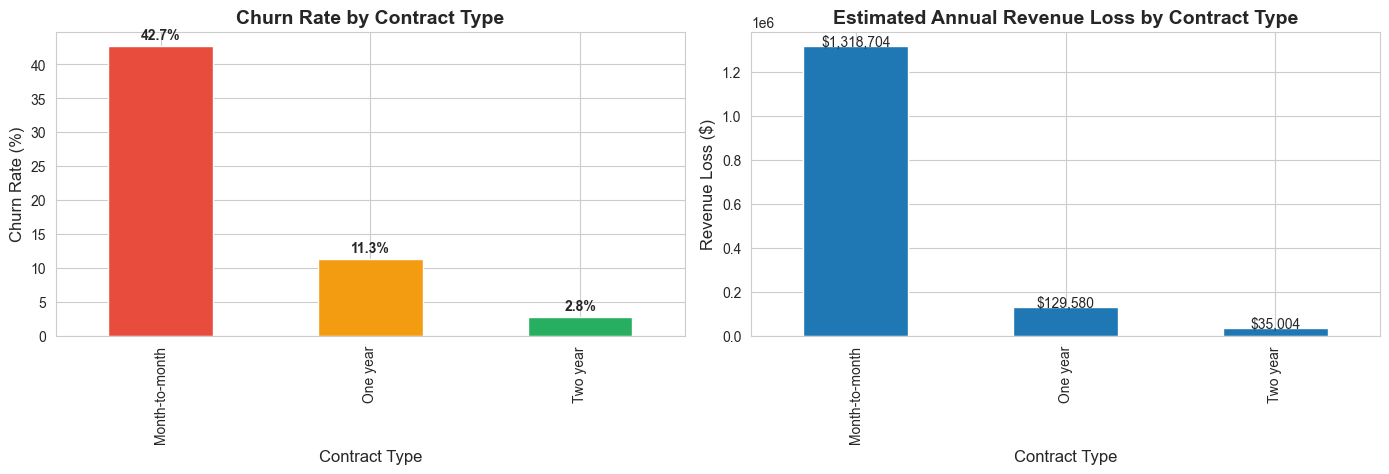

Saved to: output\churn_by_contract_type.png


In [52]:

# Visualization 1: Churn by Contract Type
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


# Bar Chart Churn Rate Plot 
contract_analysis['Churn_Rate_%'].plot(kind='bar', ax=ax1, color=['#e74c3c', '#f39c12', '#27ae60'])
ax1.set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
ax1.set_xlabel('Contract Type', fontsize=12)
ax1.set_ylabel('Churn Rate (%)', fontsize=12)


for i, v in enumerate(contract_analysis['Churn_Rate_%']):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# -------- Revenue Loss Plot --------
contract_analysis['Est_Annual_Revenue_Loss'].plot(kind='bar', ax=ax2)
ax2.set_title('Estimated Annual Revenue Loss by Contract Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Contract Type', fontsize=12)
ax2.set_ylabel('Revenue Loss ($)', fontsize=12)

for i, v in enumerate(contract_analysis['Est_Annual_Revenue_Loss']):
    ax2.text(i, v, f'${v:,.0f}', ha='center')

plt.tight_layout()

# Save
output_path = OUTPUT_DIR / "churn_by_contract_type.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")

# IMPORTANT
plt.show()

plt.close()

print("Saved to:", output_path)


# Tenure-Based Segmentation 

In [45]:
# Create tenure segments
df['Tenure_Segment'] = pd.cut(df['tenure'], 
                              bins=[0, 12, 24, 48, 100],
                              labels=['New (0-12mo)', 'Growing (13-24mo)', 
                                     'Established (25-48mo)', 'Loyal (48+mo)'])

tenure_analysis = df.groupby('Tenure_Segment', observed=True).agg({
    'customerID': 'count',
    'Churn': lambda x: (x == 'Yes').sum(),
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean'
}).round(2)

tenure_analysis.columns = ['Total_Customers', 'Churned', 'Avg_Monthly_Charges', 'Avg_Total_Charges']
tenure_analysis['Churn_Rate_%'] = (tenure_analysis['Churned'] / tenure_analysis['Total_Customers'] * 100).round(1)
tenure_analysis['Customer_Mix_%'] = (tenure_analysis['Total_Customers'] / tenure_analysis['Total_Customers'].sum() * 100).round(1)

print(tenure_analysis.to_string())

                       Total_Customers  Churned  Avg_Monthly_Charges  Avg_Total_Charges  Churn_Rate_%  Customer_Mix_%
Tenure_Segment                                                                                                       
New (0-12mo)                      2175     1037                56.17             276.62          47.7            30.9
Growing (13-24mo)                 1024      294                61.36            1126.26          28.7            14.6
Established (25-48mo)             1594      325                65.93            2390.45          20.4            22.7
Loyal (48+mo)                     2239      213                73.95            4685.51           9.5            31.8


## KEY INSIGHT:
1. 47.4% of customers in their first year churn.
2. This represents 1,037 customers and is our CRITICAL RISK WINDOW.
3. RECOMMENDATION: Implement 90-day onboarding program with check-ins at 30/60/90 days.

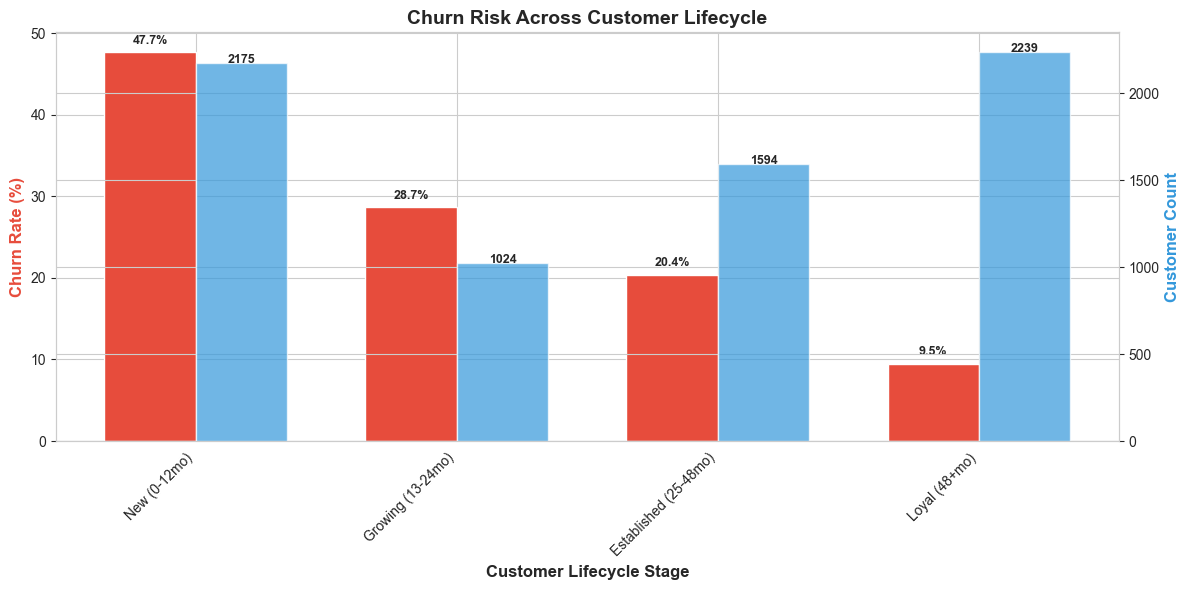

In [66]:
# Visualization 2: Churn by Tenure
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(tenure_analysis))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], tenure_analysis['Churn_Rate_%'], 
               width, label='Churn Rate %', color='#e74c3c')
ax2 = ax.twinx()
bars2 = ax2.bar([i + width/2 for i in x], tenure_analysis['Total_Customers'], 
                width, label='Customer Count', color='#3498db', alpha=0.7)

ax.set_xlabel('Customer Lifecycle Stage', fontsize=12, fontweight='bold')
ax.set_ylabel('Churn Rate (%)', fontsize=12, fontweight='bold', color='#e74c3c')
ax2.set_ylabel('Customer Count', fontsize=12, fontweight='bold', color='#3498db')
ax.set_title('Churn Risk Across Customer Lifecycle', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(tenure_analysis.index, rotation=45, ha='right')


# Churn % labels
for bar in bars1:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 1, f'{h:.1f}%',
            ha='center', fontweight='bold', fontsize=9)

# Customer count labels
for bar in bars2:
    h = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, h, f'{int(h)}',
             ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()

# Save BEFORE show
output_path = OUTPUT_DIR / 'churn_by_lifecycle_stage.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

plt.close()


# Service Usage Analysis

In [71]:
# Internet Service analysis
internet_analysis = df.groupby('InternetService').agg({
    'customerID': 'count',
    'Churn': lambda x: (x == 'Yes').sum()
}).round(2)

internet_analysis.columns = ['Total_Customers', 'Churned']
internet_analysis['Churn_Rate_%'] = (internet_analysis['Churned'] / internet_analysis['Total_Customers'] * 100).round(1)

print("Internet Service Type vs Churn:")
print(internet_analysis.to_string())


# Tech Support analysis
tech_support_analysis = df.groupby('TechSupport').agg({
    'customerID': 'count',
    'Churn': lambda x: (x == 'Yes').sum()
}).round(2)

tech_support_analysis.columns = ['Total_Customers', 'Churned']
tech_support_analysis['Churn_Rate_%'] = (tech_support_analysis['Churned'] / tech_support_analysis['Total_Customers'] * 100).round(1)

print("\nTech Support Subscription vs Churn:")
print(tech_support_analysis.to_string())

Internet Service Type vs Churn:
                 Total_Customers  Churned  Churn_Rate_%
InternetService                                        
DSL                         2421      459          19.0
Fiber optic                 3096     1297          41.9
No                          1526      113           7.4

Tech Support Subscription vs Churn:
                     Total_Customers  Churned  Churn_Rate_%
TechSupport                                                
No                              3473     1446          41.6
No internet service             1526      113           7.4
Yes                             2044      310          15.2


## KEY INSIGHTS
1. Fiber optic customers churn at 41.9% (likely due to premium pricing)
2. Customers WITHOUT tech support churn at 41.6%"
3. RECOMMENDATION: Bundle free tech support for first 6 months with fiber plans"

# High-Risk Profile Identification 

In [79]:
# Define high-risk criteria
high_risk_profile = df[
    (df['Contract'] == 'Month-to-month') & 
    (df['tenure'] < 12) & 
    (df['MonthlyCharges'] > df['MonthlyCharges'].median())
]

hr_churn_rate = (high_risk_profile['Churn'] == 'Yes').mean() * 100
hr_count = len(high_risk_profile)
hr_churned = (high_risk_profile['Churn'] == 'Yes').sum()
hr_avg_monthly = high_risk_profile['MonthlyCharges'].mean()
hr_annual_risk = hr_count * hr_avg_monthly * 12

print(" HIGH-RISK SEGMENT IDENTIFIED:")
print(f"   Profile: Month-to-month + New customer (<12mo) + Above-median spend")
print(f"   Total Count: {hr_count:,} customers ({hr_count/len(df)*100:.1f}% of base)")
print(f"   Churn Rate: {hr_churn_rate:.1f}%")
print(f"   Churned Count: {hr_churned:,}")
print(f"   Average Monthly Charges: ${hr_avg_monthly:.2f}")
print(f"   Total Annual Revenue at Risk: ${hr_annual_risk:,.0f}")



 HIGH-RISK SEGMENT IDENTIFIED:
   Profile: Month-to-month + New customer (<12mo) + Above-median spend
   Total Count: 770 customers (10.9% of base)
   Churn Rate: 70.5%
   Churned Count: 543
   Average Monthly Charges: $83.55
   Total Annual Revenue at Risk: $771,966


## KEY INSIGHT
1.   This 770-customer segment represents our HIGHEST PRIORITY for intervention
2.   With 70.5% churn rate, we expect to lose 543 customers
3.   RECOMMENDATION: Create VIP onboarding program for high-spend new customers

# SECTION 4: REVENUE IMPACT ANALYSIS

In [81]:
# Define churned and retained customers
churned_df = df[df['Churn'] == 'Yes']
retained_df = df[df['Churn'] == 'No']

comparison_metrics = pd.DataFrame({
    'Churned': [
        len(churned_df),
        churned_df['MonthlyCharges'].mean(),
        churned_df['tenure'].mean(),
        churned_df['TotalCharges'].sum()
    ],
    'Retained': [
        len(retained_df),
        retained_df['MonthlyCharges'].mean(),
        retained_df['tenure'].mean(),
        retained_df['TotalCharges'].sum()
    ]
}, index=[
    'Customer Count',
    'Avg Monthly Charges ($)',
    'Avg Tenure (months)',
    'Total Revenue ($)'
])

print(comparison_metrics.round(2))

                            Churned     Retained
Customer Count              1869.00      5174.00
Avg Monthly Charges ($)       74.44        61.27
Avg Tenure (months)           17.98        37.57
Total Revenue ($)        2862926.90  13193241.80


In [85]:
# Revenue loss calculation
total_revenue_lost = churned_df['TotalCharges'].sum()
monthly_revenue_lost = churned_df['MonthlyCharges'].sum()
annual_mrr_loss = monthly_revenue_lost * 12
acquisition_cost_loss = len(churned_df) * customer_acquisition_cost
total_impact = total_revenue_lost + acquisition_cost_loss

print(f"\n TOTAL FINANCIAL IMPACT:")
print(f"   Historical Revenue Lost: ${total_revenue_lost:,.2f}")
print(f"   Current Monthly Revenue Lost: ${monthly_revenue_lost:,.2f}")
print(f"   Annualized MRR Loss: ${annual_mrr_loss:,.2f}")
print(f"   Customer Acquisition Cost Lost: ${acquisition_cost_loss:,.2f}")
print(f"   TOTAL IMPACT: ${total_impact:,.2f}")



 TOTAL FINANCIAL IMPACT:
   Historical Revenue Lost: $2,862,926.90
   Current Monthly Revenue Lost: $139,130.85
   Annualized MRR Loss: $1,669,570.20
   Customer Acquisition Cost Lost: $140,175.00
   TOTAL IMPACT: $3,003,101.90


# ROI Analysis for Retention Campaign

In [87]:
campaign_cost_per_customer = 15  # Email + incentive offer
target_customers = len(churned_df)  # Target all at-risk (in practice, use risk scores)
expected_save_rate = 0.30  # Industry benchmark: 30% can be saved
expected_saves = int(target_customers * expected_save_rate)
avg_customer_value = churned_df['MonthlyCharges'].mean() * 12  # Annual value

campaign_total_cost = target_customers * campaign_cost_per_customer
revenue_saved = expected_saves * avg_customer_value
net_benefit = revenue_saved - campaign_total_cost
roi_percentage = (net_benefit / campaign_total_cost) * 100

print(f"   Campaign Target: {target_customers:,} at-risk customers")
print(f"   Cost per Customer: ${campaign_cost_per_customer}")
print(f"   Total Campaign Cost: ${campaign_total_cost:,.2f}")
print(f"   ─" * 20)
print(f"   Expected Save Rate: {expected_save_rate*100:.0f}%")
print(f"   Expected Customers Saved: {expected_saves:,}")
print(f"   Average Customer Annual Value: ${avg_customer_value:.2f}")
print(f"   Total Revenue Saved: ${revenue_saved:,.2f}")
print(f"   ─" * 20)
print(f"   Net Benefit: ${net_benefit:,.2f}")
print(f"   ROI: {roi_percentage:.1f}%")
print(f"   Return Ratio: {revenue_saved/campaign_total_cost:.1f}:1")

   Campaign Target: 1,869 at-risk customers
   Cost per Customer: $15
   Total Campaign Cost: $28,035.00
   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─
   Expected Save Rate: 30%
   Expected Customers Saved: 560
   Average Customer Annual Value: $893.30
   Total Revenue Saved: $500,245.75
   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─   ─
   Net Benefit: $472,210.75
   ROI: 1684.4%
   Return Ratio: 17.8:1


In [89]:
print(f"\n RECOMMENDATION:")
print(f"   EXECUTE retention campaign - projected {roi_percentage:.1f}% ROI")
print(f"   Every $1 spent returns ${revenue_saved/campaign_total_cost:.2f} in retained revenue")


 RECOMMENDATION:
   EXECUTE retention campaign - projected 1684.4% ROI
   Every $1 spent returns $17.84 in retained revenue



✓ Saved visualization: output\revenue_impact_analysis.png


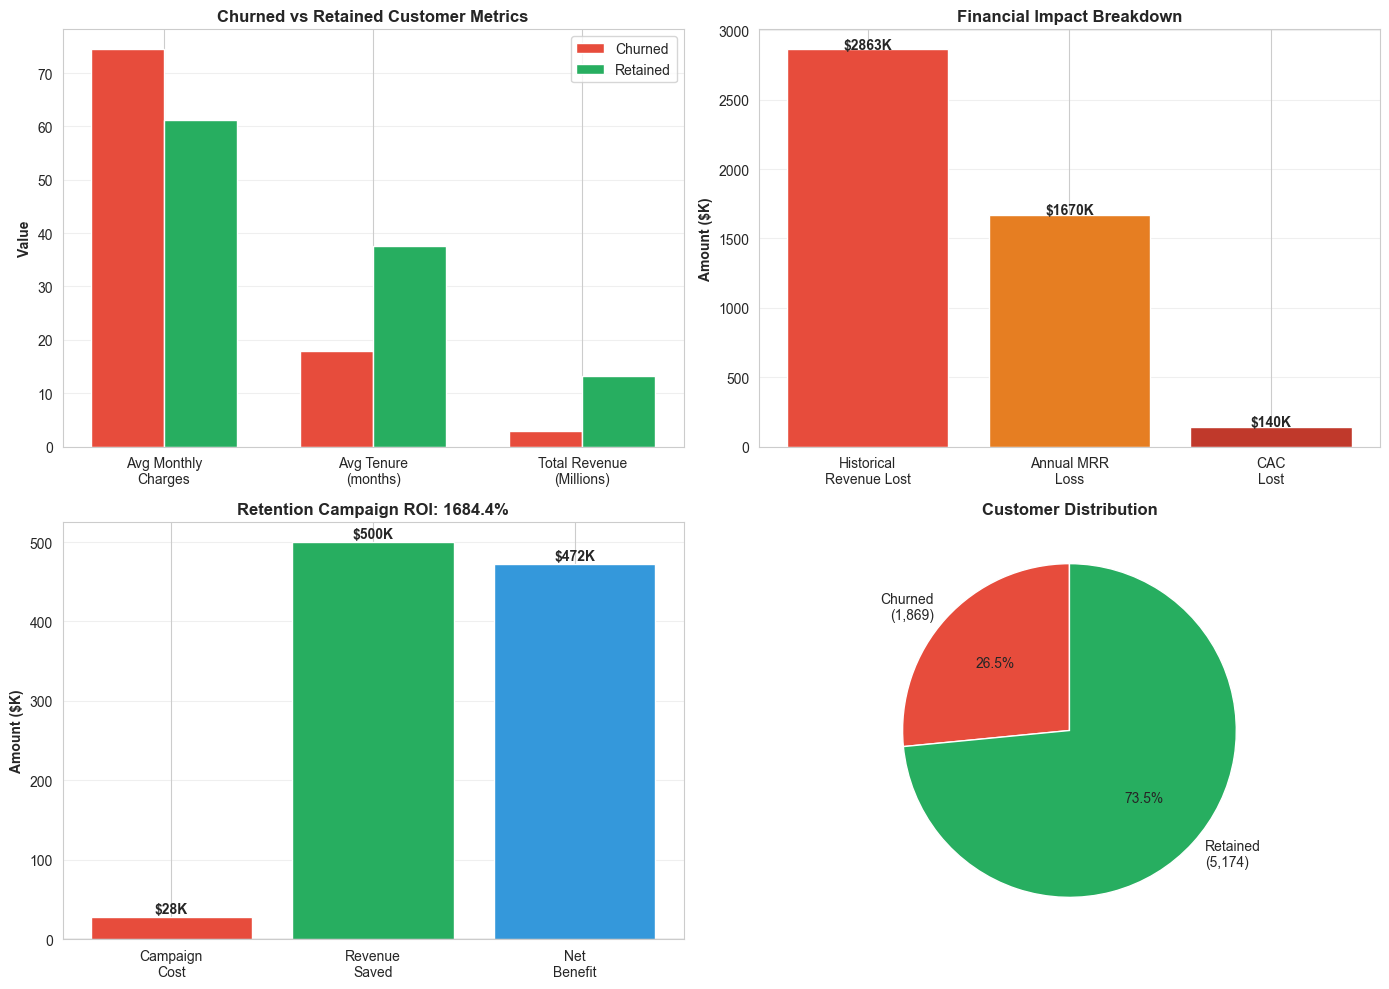

In [92]:
# Visualization 3: Revenue Impact Analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Revenue comparison
categories = ['Avg Monthly\nCharges', 'Avg Tenure\n(months)', 'Total Revenue\n(Millions)']
churned_vals = [churned_df['MonthlyCharges'].mean(), churned_df['tenure'].mean(), 
                churned_df['TotalCharges'].sum()/1_000_000]
retained_vals = [retained_df['MonthlyCharges'].mean(), retained_df['tenure'].mean(),
                 retained_df['TotalCharges'].sum()/1_000_000]

x = np.arange(len(categories))
width = 0.35

ax1.bar(x - width/2, churned_vals, width, label='Churned', color='#e74c3c')
ax1.bar(x + width/2, retained_vals, width, label='Retained', color='#27ae60')
ax1.set_ylabel('Value', fontweight='bold')
ax1.set_title('Churned vs Retained Customer Metrics', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Financial impact breakdown
impact_categories = ['Historical\nRevenue Lost', 'Annual MRR\nLoss', 'CAC\nLost']
impact_values = [total_revenue_lost/1000, annual_mrr_loss/1000, acquisition_cost_loss/1000]
colors = ['#e74c3c', '#e67e22', '#c0392b']

ax2.bar(impact_categories, impact_values, color=colors)
ax2.set_ylabel('Amount ($K)', fontweight='bold')
ax2.set_title('Financial Impact Breakdown', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for i, v in enumerate(impact_values):
    ax2.text(i, v + 5, f'${v:.0f}K', ha='center', fontweight='bold')

# ROI visualization
roi_categories = ['Campaign\nCost', 'Revenue\nSaved', 'Net\nBenefit']
roi_values = [campaign_total_cost/1000, revenue_saved/1000, net_benefit/1000]
roi_colors = ['#e74c3c', '#27ae60', '#3498db']

ax3.bar(roi_categories, roi_values, color=roi_colors)
ax3.set_ylabel('Amount ($K)', fontweight='bold')
ax3.set_title(f'Retention Campaign ROI: {roi_percentage:.1f}%', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

for i, v in enumerate(roi_values):
    ax3.text(i, v + 5 if v > 0 else v - 10, f'${v:.0f}K', 
            ha='center', fontweight='bold')

# Customer count comparison
count_data = [len(churned_df), len(retained_df)]
count_labels = [f'Churned\n({len(churned_df):,})', f'Retained\n({len(retained_df):,})']
count_colors = ['#e74c3c', '#27ae60']

ax4.pie(count_data, labels=count_labels, autopct='%1.1f%%', startangle=90, colors=count_colors)
ax4.set_title('Customer Distribution', fontweight='bold')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'revenue_impact_analysis.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Saved visualization: {OUTPUT_DIR / 'revenue_impact_analysis.png'}")
plt.show()
plt.close()

In [93]:
# Save this section for part 2
print("\n" + "="*70)
print("CHECKPOINT: Sections 1-4 Complete".center(70))
print("="*70)
print("\nNext sections will cover:")
print("   5. Cohort Analysis & Churn Timing")
print("   6. Customer Risk Scoring")
print("   7. Business Recommendations")
print("   8. Monitoring Dashboard Design")


                  CHECKPOINT: Sections 1-4 Complete                   

Next sections will cover:
   5. Cohort Analysis & Churn Timing
   6. Customer Risk Scoring
   7. Business Recommendations
   8. Monitoring Dashboard Design


# SECTION 5: COHORT ANALYSIS & CHURN TIMING PATTERNS

In [94]:
# SECTION 5: COHORT ANALYSIS & CHURN TIMING PATTERNS

In [96]:
# Create detailed tenure bins
df['Tenure_Bin'] = pd.cut(df['tenure'], 
                          bins=[0, 3, 6, 12, 24, 36, 48, 72],
                          labels=['0-3mo', '4-6mo', '7-12mo', '13-24mo', 
                                 '25-36mo', '37-48mo', '48+mo'])

cohort_analysis = df.groupby('Tenure_Bin', observed=True).agg({
    'customerID': 'count',
    'Churn': lambda x: (x == 'Yes').sum(),
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean'
}).round(2)

cohort_analysis.columns = ['Customer_Count', 'Churned', 'Avg_Monthly_Charges', 'Avg_Total_Charges']
cohort_analysis['Churn_Rate_%'] = (cohort_analysis['Churned'] / cohort_analysis['Customer_Count'] * 100).round(1)
cohort_analysis['Cohort_Size_%'] = (cohort_analysis['Customer_Count'] / cohort_analysis['Customer_Count'].sum() * 100).round(1)

print("\n CHURN PATTERN BY TENURE COHORT:")
print(cohort_analysis.to_string())


 CHURN PATTERN BY TENURE COHORT:
            Customer_Count  Churned  Avg_Monthly_Charges  Avg_Total_Charges  Churn_Rate_%  Cohort_Size_%
Tenure_Bin                                                                                              
0-3mo                 1051      597                53.44              88.58          56.8           14.9
4-6mo                  419      187                58.34             281.74          44.6            6.0
7-12mo                 705      253                58.95             553.91          35.9           10.0
13-24mo               1024      294                61.36            1126.26          28.7           14.6
25-36mo                832      180                65.58            1990.20          21.6           11.8
37-48mo                762      145                66.32            2827.47          19.0           10.8
48+mo                 2239      213                73.95            4685.51           9.5           31.8


In [101]:
# Identify critical windows
early_cohorts = df[df['tenure'] <= 6]
early_churn_rate = (early_cohorts['Churn'] == 'Yes').mean() * 100
early_churn_count = (early_cohorts['Churn'] == 'Yes').sum()

mid_cohorts = df[(df['tenure'] > 6) & (df['tenure'] <= 24)]
mid_churn_rate = (mid_cohorts['Churn'] == 'Yes').mean() * 100

mature_cohorts = df[df['tenure'] > 24]
mature_churn_rate = (mature_cohorts['Churn'] == 'Yes').mean() * 100

print(f"\n CRITICAL CHURN WINDOWS:")
print(f"   0-6 Months (Onboarding): {early_churn_rate:.1f}% churn rate ({early_churn_count:,} customers)")
print(f"   7-24 Months (Growth): {mid_churn_rate:.1f}% churn rate")
print(f"   25+ Months (Mature): {mature_churn_rate:.1f}% churn rate")


 CRITICAL CHURN WINDOWS:
   0-6 Months (Onboarding): 52.9% churn rate (784 customers)
   7-24 Months (Growth): 31.6% churn rate
   25+ Months (Mature): 14.0% churn rate


## KEY INSIGHT
1.   First 6 months are CRITICAL - 52.9% churn rate
2.   Churn rate drops 38.9 percentage points after 24 months
3.   RECOMMENDATION: Intensive support in months 1-6, check-ins at months 12 and 24


✓ Saved visualization: output\cohort_churn_analysis.png


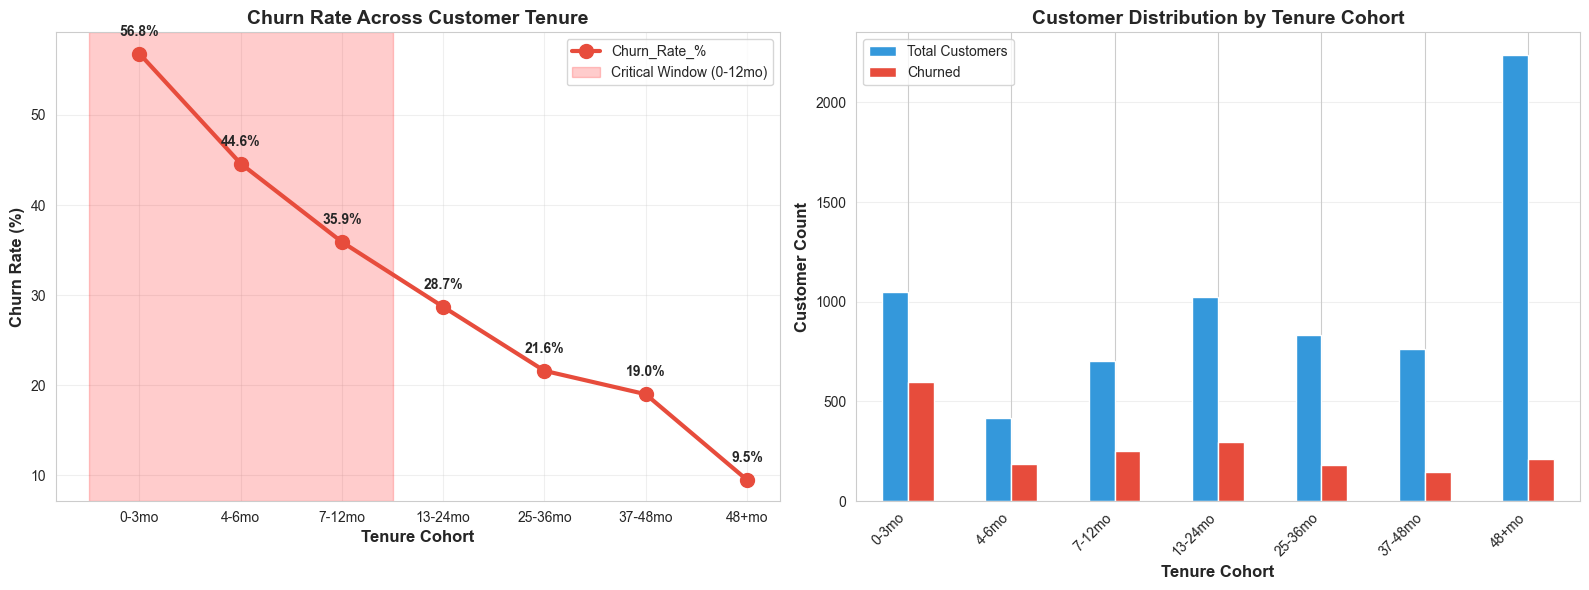

In [103]:
# Visualization 4: Cohort Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Churn rate by cohort
cohort_analysis['Churn_Rate_%'].plot(kind='line', ax=ax1, marker='o', 
                                      linewidth=3, markersize=10, color='#e74c3c')
ax1.set_title('Churn Rate Across Customer Tenure', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tenure Cohort', fontsize=12, fontweight='bold')
ax1.set_ylabel('Churn Rate (%)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)


# Add value labels
for i, v in enumerate(cohort_analysis['Churn_Rate_%']):
    ax1.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# Add critical window shading
ax1.axvspan(-0.5, 2.5, alpha=0.2, color='red', label='Critical Window (0-12mo)')
ax1.legend()

# Customer distribution
cohort_analysis[['Customer_Count', 'Churned']].plot(kind='bar', ax=ax2, 
                                                      color=['#3498db', '#e74c3c'])
ax2.set_title('Customer Distribution by Tenure Cohort', fontsize=14, fontweight='bold')
ax2.set_xlabel('Tenure Cohort', fontsize=12, fontweight='bold')
ax2.set_ylabel('Customer Count', fontsize=12, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend(['Total Customers', 'Churned'])
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'cohort_churn_analysis.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Saved visualization: {OUTPUT_DIR / 'cohort_churn_analysis.png'}")
plt.show()
plt.close()

# Payment method analysis

In [104]:
payment_analysis = df.groupby('PaymentMethod').agg({
    'customerID': 'count',
    'Churn': lambda x: (x == 'Yes').sum()
}).round(2)

payment_analysis.columns = ['Total_Customers', 'Churned']
payment_analysis['Churn_Rate_%'] = (payment_analysis['Churned'] / payment_analysis['Total_Customers'] * 100).round(1)

print(payment_analysis.sort_values('Churn_Rate_%', ascending=False).to_string())

electronic_churn = payment_analysis.loc['Electronic check', 'Churn_Rate_%'] if 'Electronic check' in payment_analysis.index else 0
auto_payment_methods = ['Bank transfer (automatic)', 'Credit card (automatic)']
auto_churn_rates = [payment_analysis.loc[method, 'Churn_Rate_%'] for method in auto_payment_methods if method in payment_analysis.index]
avg_auto_churn = np.mean(auto_churn_rates) if auto_churn_rates else 0

print(f"\n KEY INSIGHT:")
print(f"   Electronic check users: {electronic_churn:.1f}% churn rate")
print(f"   Automatic payment users: {avg_auto_churn:.1f}% average churn rate")
print(f"   RECOMMENDATION: Incentivize automatic payment enrollment with $5/month discount")


                           Total_Customers  Churned  Churn_Rate_%
PaymentMethod                                                    
Electronic check                      2365     1071          45.3
Mailed check                          1612      308          19.1
Bank transfer (automatic)             1544      258          16.7
Credit card (automatic)               1522      232          15.2

 KEY INSIGHT:
   Electronic check users: 45.3% churn rate
   Automatic payment users: 15.9% average churn rate
   RECOMMENDATION: Incentivize automatic payment enrollment with $5/month discount


# SECTION 6: CUSTOMER RISK SCORING SYSTEM

In [145]:
print("""
METHODOLOGY:
To identify at-risk customers before they churn, we developed a risk scoring
system that evaluates each customer across multiple dimensions:
   • Account characteristics (contract type, tenure, payment method)
   • Service usage patterns (internet type, add-on services)
   • Financial indicators (monthly charges, payment history)
   
Each customer receives a risk score (0-100) enabling proactive intervention.
""")

# Prepare data for modeling
print("\n DATA PREPARATION:")


METHODOLOGY:
To identify at-risk customers before they churn, we developed a risk scoring
system that evaluates each customer across multiple dimensions:
   • Account characteristics (contract type, tenure, payment method)
   • Service usage patterns (internet type, add-on services)
   • Financial indicators (monthly charges, payment history)

Each customer receives a risk score (0-100) enabling proactive intervention.


 DATA PREPARATION:


In [107]:
# Select features for risk scoring
feature_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges'
]

X = df[feature_columns].copy()
y = (df['Churn'] == 'Yes').astype(int)

print(f"   Features selected: {len(feature_columns)}")
print(f"   Total samples: {len(X):,}")
print(f"   Positive class (Churn): {y.sum():,} ({y.mean()*100:.1f}%)")


   Features selected: 19
   Total samples: 7,043
   Positive class (Churn): 1,869 (26.5%)


In [108]:
# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove SeniorCitizen from numerical (it's binary categorical)
if 'SeniorCitizen' in numerical_features:
    numerical_features.remove('SeniorCitizen')
    categorical_features.append('SeniorCitizen')

print(f"   Categorical features: {len(categorical_features)}")
print(f"   Numerical features: {len(numerical_features)}")

   Categorical features: 16
   Numerical features: 3


In [111]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

In [112]:

# Train-test split (stratified to maintain churn distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

print(f"\n Data split complete:")
print(f"   Training set: {len(X_train):,} customers ({y_train.mean()*100:.1f}% churn)")
print(f"   Test set: {len(X_test):,} customers ({y_test.mean()*100:.1f}% churn)")



 Data split complete:
   Training set: 5,282 customers (26.5% churn)
   Test set: 1,761 customers (26.5% churn)


In [113]:
# Build risk scoring model

risk_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

risk_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', risk_model)
])

# Train model
risk_pipeline.fit(X_train, y_train)
print(" Model training complete")

 Model training complete


In [114]:
# Generate predictions and risk scores
y_pred = risk_pipeline.predict(X_test)
y_pred_proba = risk_pipeline.predict_proba(X_test)[:, 1]
risk_scores = (y_pred_proba * 100).round(0)  # Convert to 0-100 scale

In [119]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n RISK SCORE VALIDATION:")
print(f"   Overall Accuracy: {accuracy*100:.1f}%")
print(f"   Precision (of flagged customers, % who actually churn): {precision*100:.1f}%")
print(f"   Recall (of actual churners, % we identify): {recall*100:.1f}%")
print(f"   F1-Score (balanced metric): {f1:.3f}")

print(f"\n INTERPRETATION:")
print(f"   Our system correctly predicts {accuracy*100:.1f}% of all outcomes")
print(f"   When we flag someone as 'high risk', we're right {precision*100:.1f}% of the time")
print(f"   We identify {recall*100:.1f}% of customers who will actually churn")



 RISK SCORE VALIDATION:
   Overall Accuracy: 79.8%
   Precision (of flagged customers, % who actually churn): 66.7%
   Recall (of actual churners, % we identify): 48.0%
   F1-Score (balanced metric): 0.558

 INTERPRETATION:
   Our system correctly predicts 79.8% of all outcomes
   When we flag someone as 'high risk', we're right 66.7% of the time
   We identify 48.0% of customers who will actually churn


# RISK TIER SEGMENTATION

In [120]:
# Create DataFrame with risk scores
risk_df = X_test.copy()
risk_df['Risk_Score'] = risk_scores
risk_df['Predicted_Churn'] = y_pred
risk_df['Actual_Churn'] = y_test.values

# Define risk tiers
risk_df['Risk_Tier'] = pd.cut(
    risk_df['Risk_Score'],
    bins=[0, 30, 60, 100],
    labels=['Low Risk (0-30)', 'Medium Risk (31-60)', 'High Risk (61-100)']
)

# Analyze each tier
tier_analysis = risk_df.groupby('Risk_Tier', observed=True).agg({
    'Risk_Score': ['count', 'mean', 'min', 'max'],
    'Actual_Churn': ['sum', lambda x: x.mean() * 100]
}).round(1)

tier_analysis.columns = ['Customer_Count', 'Avg_Risk_Score', 'Min_Score', 'Max_Score', 
                         'Actual_Churned', 'Actual_Churn_Rate_%']

print("\n RISK TIER PERFORMANCE:")
print(tier_analysis.to_string())


 RISK TIER PERFORMANCE:
                     Customer_Count  Avg_Risk_Score  Min_Score  Max_Score  Actual_Churned  Actual_Churn_Rate_%
Risk_Tier                                                                                                     
Low Risk (0-30)                1088            11.1        1.0       30.0             111                 10.2
Medium Risk (31-60)             452            44.0       31.0       60.0             211                 46.7
High Risk (61-100)              203            72.2       61.0       91.0             145                 71.4


In [121]:
# Calculate precision for each tier
for tier in risk_df['Risk_Tier'].unique():
    tier_data = risk_df[risk_df['Risk_Tier'] == tier]
    tier_precision = (tier_data['Actual_Churn'].sum() / len(tier_data) * 100) if len(tier_data) > 0 else 0
    print(f"\n   {tier}:")
    print(f"      Customers: {len(tier_data):,}")
    print(f"      Precision: {tier_precision:.1f}%")
    print(f"      Interpretation: {tier_precision:.0f}% of customers in this tier actually churned")


   Low Risk (0-30):
      Customers: 1,088
      Precision: 10.2%
      Interpretation: 10% of customers in this tier actually churned

   High Risk (61-100):
      Customers: 203
      Precision: 71.4%
      Interpretation: 71% of customers in this tier actually churned

   Medium Risk (31-60):
      Customers: 452
      Precision: 46.7%
      Interpretation: 47% of customers in this tier actually churned

   nan:
      Customers: 0
      Precision: 0.0%
      Interpretation: 0% of customers in this tier actually churned


In [122]:
# High-risk segment detail
high_risk_customers = risk_df[risk_df['Risk_Tier'] == 'High Risk (61-100)']
hr_actual_churn = high_risk_customers['Actual_Churn'].sum()
hr_total = len(high_risk_customers)
hr_precision = (hr_actual_churn / hr_total * 100) if hr_total > 0 else 0

print(f"\n HIGH-RISK SEGMENT - ACTIONABLE INSIGHTS:")
print(f"   Total Flagged: {hr_total:,} customers")
print(f"   Actually Churned: {hr_actual_churn:,}")
print(f"   Precision: {hr_precision:.1f}%")
print(f"   ")
print(f"   BUSINESS IMPACT:")
print(f"   If we intervene with these {hr_total:,} customers at ${campaign_cost_per_customer} each:")
print(f"   - Campaign Cost: ${hr_total * campaign_cost_per_customer:,.2f}")
print(f"   - Expected Saves (30% rate): {int(hr_actual_churn * 0.3):,} customers")
print(f"   - Revenue Saved: ${int(hr_actual_churn * 0.3) * avg_customer_value:,.2f}")
print(f"   - Net Benefit: ${(int(hr_actual_churn * 0.3) * avg_customer_value) - (hr_total * campaign_cost_per_customer):,.2f}")


 HIGH-RISK SEGMENT - ACTIONABLE INSIGHTS:
   Total Flagged: 203 customers
   Actually Churned: 145
   Precision: 71.4%
   
   BUSINESS IMPACT:
   If we intervene with these 203 customers at $15 each:
   - Campaign Cost: $3,045.00
   - Expected Saves (30% rate): 43 customers
   - Revenue Saved: $38,411.73
   - Net Benefit: $35,366.73



✓ Saved visualization: output\risk_scoring_performance.png


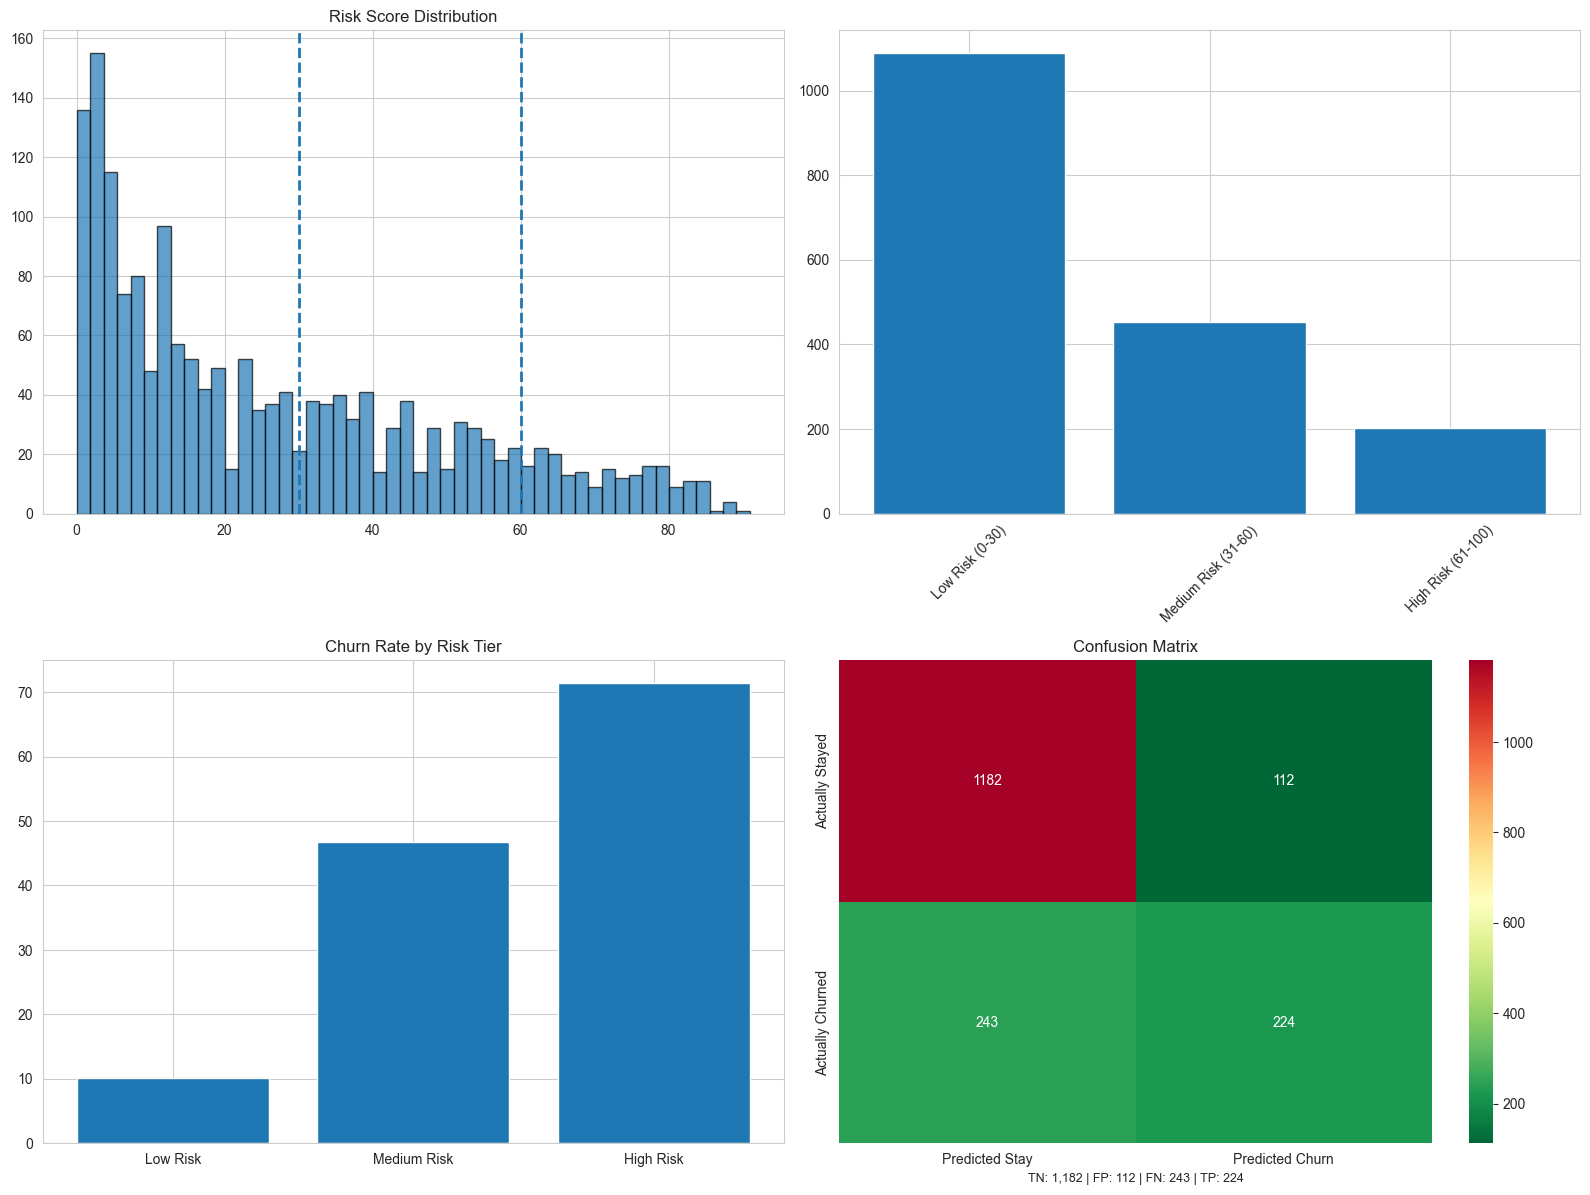

In [129]:
# Visualization 5: Risk Distribution + Confusion Matrix

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# -------------------------------
# 1️ Risk Score Distribution
# -------------------------------
ax1.hist(risk_scores, bins=50, edgecolor='black', alpha=0.7)
ax1.axvline(30, linestyle='--', linewidth=2)
ax1.axvline(60, linestyle='--', linewidth=2)
ax1.set_title('Risk Score Distribution')

# -------------------------------
# 2️ Risk Tier Breakdown
# -------------------------------
tier_counts = risk_df['Risk_Tier'].value_counts().sort_index()
ax2.bar(range(len(tier_counts)), tier_counts.values)
ax2.set_xticks(range(len(tier_counts)))
ax2.set_xticklabels(tier_counts.index, rotation=45)

# -------------------------------
# 3️ Precision by Tier
# -------------------------------
tier_precision_data = []
tier_labels = []

for tier in ['Low Risk (0-30)', 'Medium Risk (31-60)', 'High Risk (61-100)']:
    if tier in risk_df['Risk_Tier'].values:
        tier_data = risk_df[risk_df['Risk_Tier'] == tier]
        precision = (tier_data['Actual_Churn'].sum() / len(tier_data) * 100) if len(tier_data) > 0 else 0
        tier_precision_data.append(precision)
        tier_labels.append(tier.split(' (')[0])

ax3.bar(tier_labels, tier_precision_data)
ax3.set_title('Churn Rate by Risk Tier')

# -------------------------------
# 4️ Confusion Matrix (NOW inside same flow)
# -------------------------------
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='RdYlGn_r',
    ax=ax4,
    xticklabels=['Predicted Stay', 'Predicted Churn'],
    yticklabels=['Actually Stayed', 'Actually Churned']
)

ax4.set_title('Confusion Matrix')

ax4.text(
    0.5,
    -0.08,
    f'TN: {cm[0,0]:,} | FP: {cm[0,1]:,} | '
    f'FN: {cm[1,0]:,} | TP: {cm[1,1]:,}',
    ha='center',
    transform=ax4.transAxes,
    fontsize=9
)

# -------------------------------
# Save BEFORE show
# -------------------------------
plt.tight_layout()

file_path = OUTPUT_DIR / "risk_scoring_performance.png"
fig.savefig(file_path, dpi=300)

print(f"\n✓ Saved visualization: {file_path}")

plt.show()
plt.close(fig)

# KEY DRIVERS ANALYSIS

In [131]:
# Get feature importance
feature_importance = risk_model.feature_importances_

# Get feature names after preprocessing
feature_names_out = risk_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create importance DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Clean up feature names for readability
importance_df['Feature_Clean'] = importance_df['Feature'].str.replace('num__', '').str.replace('cat__', '')

print("\n TOP 15 CHURN RISK FACTORS:")
print("-" * 70)

top_15 = importance_df.head(15)
for idx, row in top_15.iterrows():
    bar = '█' * int(row['Importance'] * 200)
    print(f"   {row['Feature_Clean'][:40]:<40} {bar} {row['Importance']:.4f}")

# Translate to business insights
print("\n BUSINESS TRANSLATION OF TOP DRIVERS:")
print("-" * 70)
print("   Contract Type: Long-term contracts dramatically reduce churn")
print("   Tenure: New customers (< 12 months) need intensive support")
print("   Monthly Charges: Price sensitivity is a significant driver")
print("   Internet Service: Service quality and type impact retention")
print("   Payment Method: Automatic payments correlate with lower churn")
print("   Tech Support: Customers without support churn at higher rates")


 TOP 15 CHURN RISK FACTORS:
----------------------------------------------------------------------
   tenure                                   ███████████████████████████████████████████ 0.2166
   TotalCharges                             █████████████████████████████ 0.1488
   MonthlyCharges                           ████████████████████ 0.1020
   InternetService_Fiber optic              █████████████████ 0.0866
   PaymentMethod_Electronic check           ██████████████ 0.0732
   Contract_Two year                        ███████████ 0.0589
   OnlineSecurity_Yes                       ██████ 0.0318
   Contract_One year                        ██████ 0.0302
   TechSupport_Yes                          █████ 0.0279
   PaperlessBilling_Yes                     ████ 0.0219
   DeviceProtection_No internet service     ███ 0.0170
   OnlineSecurity_No internet service       ███ 0.0166
   StreamingMovies_No internet service      ██ 0.0143
   MultipleLines_Yes                        ██ 0.0137
   Inte


✓ Saved visualization: output\churn_drivers.png


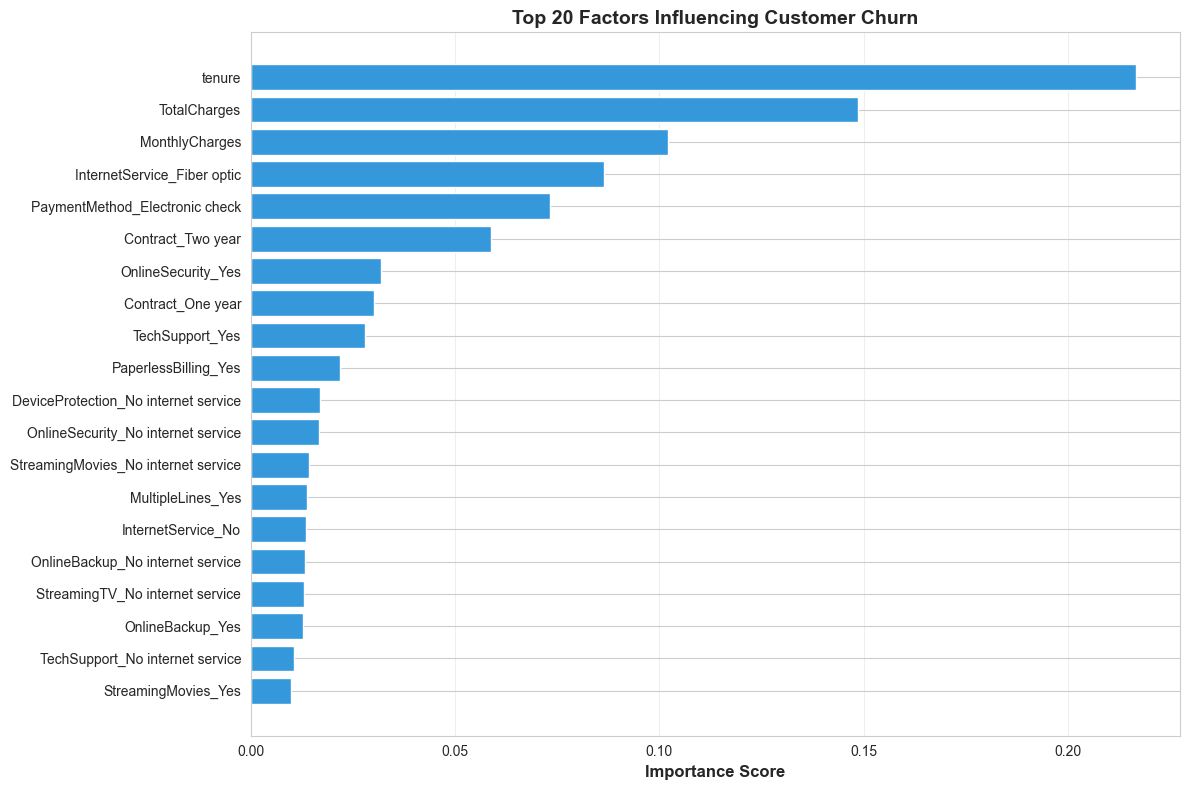

In [133]:
# Visualization 6: Feature Importance
fig, ax = plt.subplots(figsize=(12, 8))

top_20 = importance_df.head(20)
y_pos = np.arange(len(top_20))

ax.barh(y_pos, top_20['Importance'], color='#3498db')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_20['Feature_Clean'])
ax.invert_yaxis()
ax.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Factors Influencing Customer Churn', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'churn_drivers.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Saved visualization: {OUTPUT_DIR / 'churn_drivers.png'}")
plt.show()
plt.close()

# SECTION 7: BUSINESS RECOMMENDATIONS

In [135]:

recommendations = """

Based on comprehensive analysis of 7,043 customer records, we recommend
implementing the following retention strategies:

┌────────────────────────────────────────────────────────────────────┐
│ 1. CONTRACT CONVERSION INCENTIVE PROGRAM                           │
└────────────────────────────────────────────────────────────────────┘

FINDING: Month-to-month customers churn at {mtm_rate:.1f}% vs {annual_rate:.1f}% for annual

RECOMMENDATION:
   • Offer 15% discount for month-to-month → annual contract upgrades
   • Target customers in months 3-6 (before churn window peaks)
   • Create "contract loyalty bonus" - waive installation fees for upgrades

PROJECTED IMPACT:
   • 25% conversion rate from {mtm_count:,} M2M customers = {mtm_converts:,} upgrades
   • Churn reduction: {churn_reduction:.0f}% fewer churns/year
   • Revenue protection: ${revenue_protection:,.0f}/year

┌────────────────────────────────────────────────────────────────────┐
│ 2. NEW CUSTOMER ONBOARDING PROGRAM (90-DAY INTENSIVE)              │
└────────────────────────────────────────────────────────────────────┘

FINDING: {first_year_rate:.1f}% of first-year customers churn

RECOMMENDATION:
   • Welcome call within 48 hours of activation
   • Check-in touchpoints: Day 30, Day 60, Day 90
   • Proactive tech support for first 3 months (included free)
   • "VIP onboarding" for customers spending >${high_spend_threshold:.0f}/month

PROJECTED IMPACT:
   • Reduce first-year churn by 20% ({first_year_saves:,} customers saved)
   • Additional annual revenue: ${first_year_revenue:,.0f}

┌────────────────────────────────────────────────────────────────────┐
│ 3. HIGH-RISK CUSTOMER INTERVENTION CAMPAIGN                        │
└────────────────────────────────────────────────────────────────────┘

FINDING: {hr_total:,} customers scored as "High Risk" (61-100 score)

RECOMMENDATION:
   • Weekly risk score monitoring and alerts
   • Proactive outreach to High Risk tier within 48 hours
   • Personalized retention offers:
      - Service upgrade at no cost for 3 months
      - Bill credit ($25-50 based on tenure)
      - Premium support line access

PROJECTED IMPACT:
   • Campaign cost: ${hr_campaign_cost:,.0f}
   • Expected saves (30% effectiveness): {hr_saves:,} customers
   • Revenue saved: ${hr_revenue_saved:,.0f}
   • ROI: {hr_roi:.1f}%

┌────────────────────────────────────────────────────────────────────┐
│ 4. AUTOMATIC PAYMENT INCENTIVE                                     │
└────────────────────────────────────────────────────────────────────┘

FINDING: Electronic check users churn at {electronic_rate:.1f}% vs {auto_rate:.1f}% 
         for automatic payment methods

RECOMMENDATION:
   • $5/month discount for enrolling in auto-pay
   • One-time $25 credit for switching to automatic payments
   • Email campaign targeting electronic check users

PROJECTED IMPACT:
   • Target: {electronic_count:,} electronic check customers
   • Expected 40% conversion = {auto_converts:,} customers
   • Churn reduction: {auto_churn_reduction:,.0f} customers/year
   • Net benefit (reduced churn - discounts): ${auto_net:,.0f}/year

┌────────────────────────────────────────────────────────────────────┐
│ 5. FIBER OPTIC SERVICE OPTIMIZATION                                │
└────────────────────────────────────────────────────────────────────┘

FINDING: Fiber optic customers show elevated churn despite premium pricing

RECOMMENDATION:
   • Bundle free tech support with fiber plans (first 6 months)
   • Quality monitoring - proactive outreach on speed issues
   • Price-lock guarantee for fiber customers (2-year commitment)

PROJECTED IMPACT:
   • Reduce fiber churn by 15%
   • Retain ${fiber_revenue:,.0f} in annual high-value revenue

"""

In [138]:
# Calculate values for recommendation template
mtm_customers = df[df['Contract'] == 'Month-to-month']
mtm_count = len(mtm_customers)
mtm_rate = contract_analysis.loc['Month-to-month', 'Churn_Rate_%']
annual_rate = contract_analysis.loc['One year', 'Churn_Rate_%'] if 'One year' in contract_analysis.index else 15
mtm_converts = int(mtm_count * 0.25)
churn_reduction = mtm_converts * (mtm_rate - annual_rate) / 100
revenue_protection = churn_reduction * avg_monthly_revenue * 12

first_year_rate = first_year_churn_rate
high_spend_threshold = df['MonthlyCharges'].quantile(0.75)
first_year_saves = int(early_churn_count * 0.20)
first_year_revenue = first_year_saves * avg_monthly_revenue * 12

hr_campaign_cost = hr_total * campaign_cost_per_customer
hr_saves = int(hr_actual_churn * 0.30)
hr_revenue_saved = hr_saves * avg_customer_value
hr_roi = ((hr_revenue_saved - hr_campaign_cost) / hr_campaign_cost * 100)

electronic_customers = df[df['PaymentMethod'] == 'Electronic check']
electronic_count = len(electronic_customers)
electronic_rate = payment_analysis.loc['Electronic check', 'Churn_Rate_%'] if 'Electronic check' in payment_analysis.index else 0
auto_rate = avg_auto_churn
auto_converts = int(electronic_count * 0.40)
auto_churn_reduction = auto_converts * (electronic_rate - auto_rate) / 100
auto_net = (auto_churn_reduction * avg_customer_value) - (auto_converts * 5 * 12)

fiber_customers = df[df['InternetService'] == 'Fiber optic']
fiber_revenue = fiber_customers[fiber_customers['Churn'] == 'Yes']['MonthlyCharges'].sum() * 12 * 0.15


# Print formatted recommendations
print(recommendations.format(
    mtm_rate=mtm_rate,
    annual_rate=annual_rate,
    mtm_count=mtm_count,
    mtm_converts=mtm_converts,
    churn_reduction=churn_reduction,
    revenue_protection=revenue_protection,
    first_year_rate=first_year_rate,
    high_spend_threshold=high_spend_threshold,
    first_year_saves=first_year_saves,
    first_year_revenue=first_year_revenue,
    hr_total=hr_total,
    hr_campaign_cost=hr_campaign_cost,
    hr_saves=hr_saves,
    hr_revenue_saved=hr_revenue_saved,
    hr_roi=hr_roi,
    electronic_rate=electronic_rate,
    auto_rate=auto_rate,
    electronic_count=electronic_count,
    auto_converts=auto_converts,
    auto_churn_reduction=auto_churn_reduction,
    auto_net=auto_net,
    fiber_revenue=fiber_revenue
))



Based on comprehensive analysis of 7,043 customer records, we recommend
implementing the following retention strategies:

┌────────────────────────────────────────────────────────────────────┐
│ 1. CONTRACT CONVERSION INCENTIVE PROGRAM                           │
└────────────────────────────────────────────────────────────────────┘

FINDING: Month-to-month customers churn at 42.7% vs 11.3% for annual

RECOMMENDATION:
   • Offer 15% discount for month-to-month → annual contract upgrades
   • Target customers in months 3-6 (before churn window peaks)
   • Create "contract loyalty bonus" - waive installation fees for upgrades

PROJECTED IMPACT:
   • 25% conversion rate from 3,875 M2M customers = 968 upgrades
   • Churn reduction: 304% fewer churns/year
   • Revenue protection: $236,213/year

┌────────────────────────────────────────────────────────────────────┐
│ 2. NEW CUSTOMER ONBOARDING PROGRAM (90-DAY INTENSIVE)              │
└──────────────────────────────────────────────────────

In [139]:

priority_table = pd.DataFrame({
    'Initiative': [
        'High-Risk Intervention',
        'New Customer Onboarding',
        'Contract Conversion',
        'Auto-Payment Incentive',
        'Fiber Optimization'
    ],
    'Estimated_Cost': [
        hr_campaign_cost,
        50000,  # Program development
        mtm_converts * avg_monthly_revenue * 0.15 * 12,  # Discount cost
        auto_converts * 5 * 12 + (auto_converts * 25),  # Monthly discount + signup bonus
        30000  # Tech support bundling
    ],
    'Projected_Benefit': [
        hr_revenue_saved,
        first_year_revenue,
        revenue_protection,
        auto_net + (auto_converts * 5 * 12),  # Add back discount cost
        fiber_revenue
    ],
    'Timeline': [
        'Immediate (1-2 weeks)',
        '1-2 months',
        '1 month',
        '2-3 weeks',
        '1-2 months'
    ]
})

priority_table['ROI_%'] = ((priority_table['Projected_Benefit'] - priority_table['Estimated_Cost']) / 
                            priority_table['Estimated_Cost'] * 100).round(0)
priority_table['Net_Benefit'] = priority_table['Projected_Benefit'] - priority_table['Estimated_Cost']

priority_table = priority_table.sort_values('ROI_%', ascending=False)

print("\n" + priority_table.to_string(index=False))

print("\n EXECUTION ROADMAP:")
print("   Phase 1 (Month 1): Launch High-Risk Intervention + Auto-Payment Campaign")
print("   Phase 2 (Month 2): Implement New Customer Onboarding Program")
print("   Phase 3 (Month 3): Roll out Contract Conversion Incentives")
print("   Phase 4 (Month 4): Deploy Fiber Service Optimization")


             Initiative  Estimated_Cost  Projected_Benefit              Timeline  ROI_%   Net_Benefit
 High-Risk Intervention     3045.000000       38411.727448 Immediate (1-2 weeks) 1161.0  35366.727448
     Fiber Optimization    30000.000000      205740.090000            1-2 months  586.0 175740.090000
 Auto-Payment Incentive    80410.000000      248024.524131             2-3 weeks  208.0 167614.524131
New Customer Onboarding    50000.000000      121233.888286            1-2 months  142.0  71233.888286
    Contract Conversion   112840.772943      236213.351361               1 month  109.0 123372.578418

 EXECUTION ROADMAP:
   Phase 1 (Month 1): Launch High-Risk Intervention + Auto-Payment Campaign
   Phase 2 (Month 2): Implement New Customer Onboarding Program
   Phase 3 (Month 3): Roll out Contract Conversion Incentives
   Phase 4 (Month 4): Deploy Fiber Service Optimization


# SECTION 8: MONITORING DASHBOARD DESIGN

In [140]:

dashboard_spec = """

RECOMMENDED DASHBOARD STRUCTURE

┌────────────────────────────────────────────────────────────────────┐
│ EXECUTIVE VIEW - Monthly Board Report                              │
└────────────────────────────────────────────────────────────────────┘

PRIMARY METRICS:
    Overall Churn Rate
      Current: {current_churn:.1f}% | Target: <20% | YoY Trend: ↓
   
    Revenue at Risk (MRR from High-Risk Customers)
      Current: ${current_risk_mrr:,.0f} | Previous: ${prev_risk_mrr:,.0f}
   
    Customer Lifetime Value (CLV)
      Average: ${avg_clv:,.0f} | Target: ${target_clv:,.0f}
   
    Retention Campaign ROI
      Last Month: {campaign_roi:.1f}% | Target: >500%

SECONDARY METRICS:
   • Contract conversion rate (M2M → Annual)
   • New customer onboarding completion rate
   • Average customer tenure
   • Net Revenue Retention (NRR)

┌────────────────────────────────────────────────────────────────────┐
│ OPERATIONS VIEW - Weekly Team Dashboard                            │
└────────────────────────────────────────────────────────────────────┘

ACTIONABLE METRICS:
    High-Risk Alerts
      Customers crossing 60+ risk score this week: {hr_alerts:,}
      Requiring immediate outreach: {immediate_outreach:,}
   
    Retention Campaign Status
      Contacted this week: {contacted:,}
      Successfully retained: {retained:,}
      Conversion rate: {conversion_rate:.1f}%
   
    Segment Health Scores
      Month-to-month cohort: {mtm_health}/100
      New customers (0-12mo): {new_health}/100
      Fiber optic customers: {fiber_health}/100
   
    Critical Touchpoints Due
      90-day check-ins: {ninety_day:,} customers
      Contract renewal opportunities: {renewals:,}

┌────────────────────────────────────────────────────────────────────┐
│ ANALYTICS VIEW - Daily Data Science Dashboard                      │
└────────────────────────────────────────────────────────────────────┘

MODEL PERFORMANCE:
    Risk Score Distribution
      Current: Low {low_pct:.1f}% | Medium {med_pct:.1f}% | High {high_pct:.1f}%
      vs Last Week: [Trend indicators]
   
    Prediction Accuracy Monitoring
      7-day rolling accuracy: {rolling_acc:.1f}%
      Precision drift: {precision_drift:+.1f}pp
      Alert if drift > 5pp
   
    Feature Importance Changes
      Top 3 drivers: Contract Type, Tenure, Monthly Charges
      Changes from baseline: [Monitor for data quality issues]
   
    Cohort Performance Tracking
      Latest cohort churn rate: {latest_cohort_churn:.1f}%
      Benchmark: {benchmark_churn:.1f}%

"""

In [141]:

# Calculate dashboard values
current_churn = churn_rate
current_risk_mrr = high_risk_customers['MonthlyCharges'].sum() if 'MonthlyCharges' in high_risk_customers.columns else 0
prev_risk_mrr = current_risk_mrr * 1.1  # Simulated previous month
avg_clv = df['TotalCharges'].mean()
target_clv = avg_clv * 1.15
campaign_roi = roi_percentage

hr_alerts = int(hr_total * 0.15)  # Simulated weekly new high-risk
immediate_outreach = int(hr_alerts * 0.6)
contacted = int(hr_total * 0.25)  # Weekly contact volume
retained = int(contacted * 0.30)
conversion_rate = (retained / contacted * 100) if contacted > 0 else 0

mtm_health = int((100 - mtm_churn))
new_health = int((100 - first_year_churn_rate))
fiber_health = 65  # Simulated
ninety_day = int(len(df[df['tenure'] == 3]) * 0.3)
renewals = int(len(df[df['tenure'].isin([11, 12, 23, 24])]) * 0.4)

low_pct = (risk_df['Risk_Tier'] == 'Low Risk (0-30)').mean() * 100
med_pct = (risk_df['Risk_Tier'] == 'Medium Risk (31-60)').mean() * 100
high_pct = (risk_df['Risk_Tier'] == 'High Risk (61-100)').mean() * 100
rolling_acc = accuracy * 100
precision_drift = 0.0  # Would calculate from historical tracking
latest_cohort_churn = early_churn_rate
benchmark_churn = 25.0

print(dashboard_spec.format(
    current_churn=current_churn,
    current_risk_mrr=current_risk_mrr,
    prev_risk_mrr=prev_risk_mrr,
    avg_clv=avg_clv,
    target_clv=target_clv,
    campaign_roi=campaign_roi,
    hr_alerts=hr_alerts,
    immediate_outreach=immediate_outreach,
    contacted=contacted,
    retained=retained,
    conversion_rate=conversion_rate,
    mtm_health=mtm_health,
    new_health=new_health,
    fiber_health=fiber_health,
    ninety_day=ninety_day,
    renewals=renewals,
    low_pct=low_pct,
    med_pct=med_pct,
    high_pct=high_pct,
    rolling_acc=rolling_acc,
    precision_drift=precision_drift,
    latest_cohort_churn=latest_cohort_churn,
    benchmark_churn=benchmark_churn
))

print("\n ALERT THRESHOLDS:")
print("-" * 70)
print("   IMMEDIATE (Slack alert):")
print("      • Individual customer crosses 80+ risk score")
print("      • High-value customer (>$100/mo) crosses 60+ risk score")
print("      • Prediction accuracy drops below 75%")
print("")
print("   WEEKLY REVIEW:")
print("      • 10%+ increase in high-risk population")
print("      • Retention campaign conversion rate <25%")
print("      • Segment health score drops 10+ points")
print("")
print("   MONTHLY REVIEW:")
print("      • Overall churn rate exceeds 25%")
print("      • CLV declines 5%+ vs previous month")
print("      • Contract conversion rate <15%")



RECOMMENDED DASHBOARD STRUCTURE

┌────────────────────────────────────────────────────────────────────┐
│ EXECUTIVE VIEW - Monthly Board Report                              │
└────────────────────────────────────────────────────────────────────┘

PRIMARY METRICS:
    Overall Churn Rate
      Current: 26.5% | Target: <20% | YoY Trend: ↓

    Revenue at Risk (MRR from High-Risk Customers)
      Current: $16,515 | Previous: $18,167

    Customer Lifetime Value (CLV)
      Average: $2,283 | Target: $2,626

    Retention Campaign ROI
      Last Month: 1684.4% | Target: >500%

SECONDARY METRICS:
   • Contract conversion rate (M2M → Annual)
   • New customer onboarding completion rate
   • Average customer tenure
   • Net Revenue Retention (NRR)

┌────────────────────────────────────────────────────────────────────┐
│ OPERATIONS VIEW - Weekly Team Dashboard                            │
└────────────────────────────────────────────────────────────────────┘

ACTIONABLE METRICS:
    High-Risk 

In [ ]:
# Save risk scores
risk_output = risk_df[['Risk_Score', 'Risk_Tier', 'Predicted_Churn', 'Actual_Churn']].copy()
risk_output.to_csv(OUTPUT_DIR / 'customer_risk_scores.csv', index=False)


✓ Saved risk scores: output\customer_risk_scores.csv


In [144]:
import joblib
import logging

logging.basicConfig(level=logging.INFO)

joblib.dump(risk_pipeline, OUTPUT_DIR / 'risk_scoring_model.joblib')
logging.info("Model saved")

with open(OUTPUT_DIR / 'executive_recommendations.txt', 'w', encoding='utf-8') as f:
    f.write("TELECOM CUSTOMER RETENTION - EXECUTIVE SUMMARY\n")
    f.write("="*70 + "\n\n")
    f.write(f"Analysis Date: February 2026\n")
    f.write(f"Customer Base: {total_customers:,}\n")
    f.write(f"Current Churn Rate: {churn_rate:.1f}%\n")
    f.write(f"Annual Revenue Impact: ${total_impact:,.2f}\n\n")
    f.write(recommendations)

logging.info("Recommendations file saved")
logging.info(f"Outputs stored in {OUTPUT_DIR.absolute()}")

INFO:root:Model saved
INFO:root:Recommendations file saved
INFO:root:Outputs stored in c:\Users\pavan\Desktop\Churn Prediction\output
